In [ ]:
import os
import albumentations as albu
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
images_filenames_train = ['../../data/dataset/ResizedImages/' + p for p in os.listdir(path='../../data/dataset/ResizedImages/')]
labels_filenames_train = ['../../data/dataset/ResizedPigment/' + p for p in os.listdir(path='../../data/dataset/ResizedPigment/')]

In [ ]:
labels_filenames_train = sorted(labels_filenames_train, key=lambda file: int((file.split('/')[-1]).split('.')[0]))
images_filenames_train = sorted(images_filenames_train, key=lambda file: int((file.split('/')[-1]).split('.')[0]))

In [ ]:
images = [io.imread(im) for im in images_filenames_train]
labels = [io.imread(l) for l in labels_filenames_train]

DATA AUGMENTATION

In [ ]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [ ]:
transform = albu.Compose([
    albu.HorizontalFlip(p = 0.5),
    albu.OneOf([albu.ElasticTransform(),
                albu.OpticalDistortion(),
                albu.GridDistortion()], p = 1),
    albu.OneOf([albu.RandomBrightnessContrast(),
                albu.RandomGamma()], p = 1),

    ])

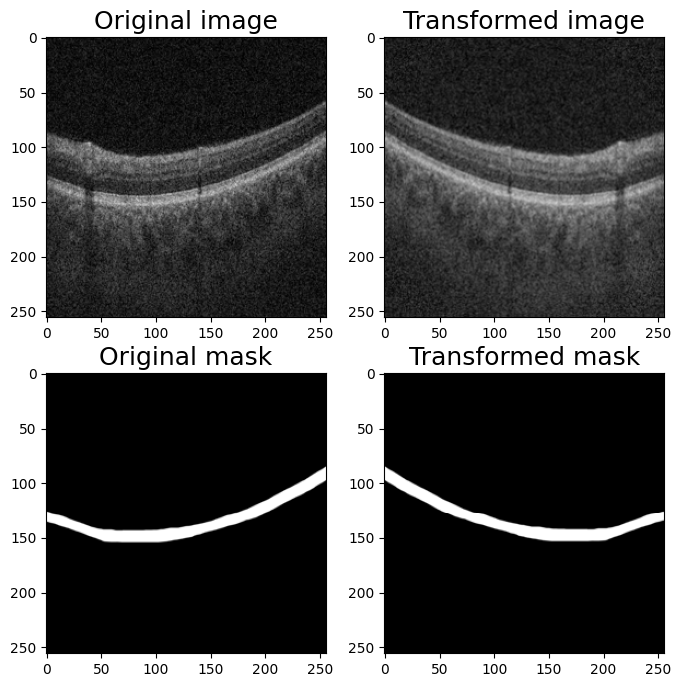

In [ ]:
augmented = transform(image=images[0], mask=labels[0])

image_elastic = augmented['image']
mask_elastic = augmented['mask']

visualize(image_elastic, mask_elastic, original_image=images[0], original_mask=labels[0])

In [ ]:
for idx, (im, l) in enumerate(zip(images, labels)):
  augmented = transform(image=im, mask=l)
  image_elastic = augmented['image']
  mask_elastic = augmented['mask']
  im = Image.fromarray(image_elastic)
  label = Image.fromarray(mask_elastic)
  im.save('../../data/dataset/AugmentatedImages/' + str(idx+1) + '.png')
  label.save('../../data/dataset/AugmentatedPigment/' + str(idx+1) + '.png')